<a href="https://colab.research.google.com/github/K1RUN/PyTorchMotorTemperatureRegression/blob/main/PyTorchMotorTemperatureRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kirun1","key":"f5f6a55f73746d1c09e0ad4a9ec72723"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d wkirgsn/electric-motor-temperature

Dataset URL: https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature
License(s): CC-BY-SA-4.0
100% 116M/117M [00:01<00:00, 78.3MB/s]
100% 117M/117M [00:01<00:00, 87.2MB/s]


In [6]:
! unzip electric-motor-temperature.zip

Archive:  electric-motor-temperature.zip
  inflating: measures_v2.csv         


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('measures_v2.csv')
df.drop('profile_id', axis=1, inplace=True)

In [9]:
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60


In [10]:
X = df.drop('torque', axis=1)
y = df['torque']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X.columns)

In [13]:
X_test = pd.DataFrame(scale.transform(X_test), columns=X.columns)

In [14]:
y_train = pd.DataFrame(scale.fit_transform(y_train.values.reshape(-1, 1)),
                       columns=['torque'])

In [15]:
y_test = pd.DataFrame(scale.transform(y_test.values.reshape(-1, 1)),
                      columns=['torque'])

In [16]:
X_test

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient
0,0.728613,1.322868,1.341300,-1.158856,1.527861,1.503556,-0.983579,0.181307,1.681132,1.533726,0.595682
1,-0.881172,0.208160,1.649903,-1.662308,1.298450,1.503560,-2.113116,0.420615,1.208469,0.823787,-0.891226
2,0.333085,-0.135595,-0.332635,2.152873,-0.257302,1.275997,-1.216125,-1.301515,0.490303,-0.169963,-0.456066
3,-0.675149,1.355993,1.281090,0.196480,1.489310,-0.915181,0.820242,0.362024,0.270683,1.604925,-0.127936
4,-0.532747,-0.803921,1.206486,-1.620189,0.740182,1.234743,-1.894127,0.502527,0.771614,0.152976,-2.403092
...,...,...,...,...,...,...,...,...,...,...,...
439165,0.260407,1.657779,0.771297,2.158585,1.026228,0.608643,-0.787462,-1.605679,1.004104,1.197501,0.829637
439166,0.712417,2.515797,1.564045,-1.178392,2.033290,0.080485,0.213643,1.014892,1.658552,2.443668,1.808178
439167,1.664373,0.912855,0.029422,0.673107,0.373573,0.331784,0.990737,-0.577923,0.221033,0.653908,2.288847
439168,0.371333,-0.820796,-0.120759,-1.358180,-0.329139,0.428289,-0.851143,0.823029,-0.669901,-0.551694,-1.528107


In [17]:
y_test

,torque
0,0.212570
1,0.568888
2,-1.402356
3,0.244801
4,0.634175
...,...
439165,-1.674711
439166,0.917986
439167,-0.560378
439168,0.894761


<Axes: >

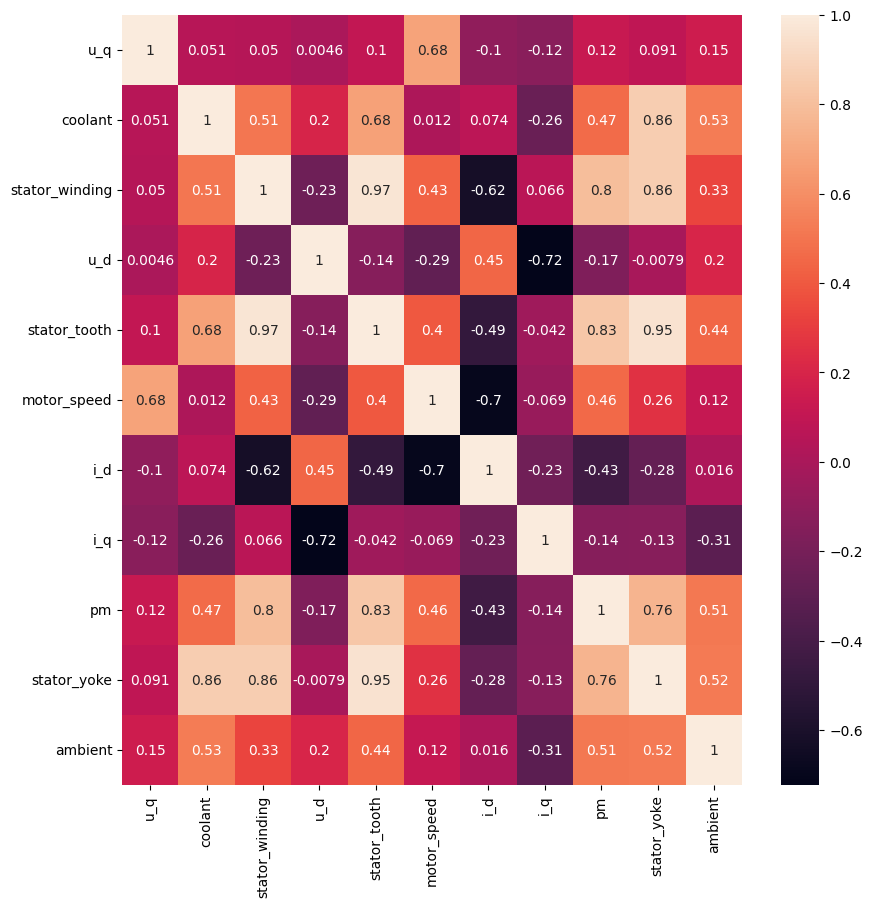

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(X_train.corr(), annot=True, ax=ax)

In [19]:
target_correlation = X_train.corrwith(y_train['torque'])

Text(0.5, 1.0, 'Correlation with target variable torque')

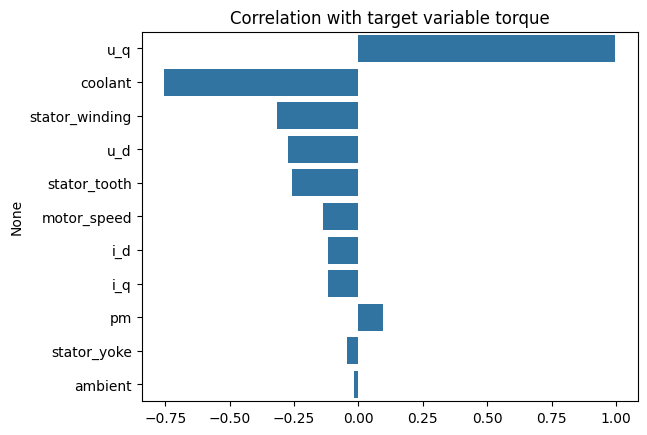

In [20]:
sns.barplot(x=sorted(target_correlation.values, key=abs,
                  reverse=True), y=target_correlation.index, orient='h')
plt.title("Correlation with target variable torque")

In [21]:
sorted(target_correlation.values, key=abs, reverse=True)

[0.9964560815600307,
 -0.7537196145275826,
 -0.3166146938795659,
 -0.27410033527274313,
 -0.25791244963830806,
 -0.136379418984725,
 -0.11782436226168781,
 -0.11701649628209397,
 0.09578235821593646,
 -0.044164963868298455,
 -0.018275732271170856]

In [22]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

loader = DataLoader(list(zip(X_train.values, y_train.values)), shuffle=True,
                    batch_size=64)

In [24]:
model = nn.Sequential(
    nn.Linear(11, 11),
    nn.ReLU(),
    nn.Linear(11, 12),
    nn.ReLU(),
    nn.Linear(12, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

In [25]:
n_epochs = 10
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        X_batch = X_batch.float()
        y_batch = y_batch.float()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


## Results

In [26]:
model.eval()
y_pred = model(torch.Tensor(X_test.values))

In [27]:
loss_fn(y_pred, torch.Tensor(y_test.values)).item()

0.0002451192121952772

In [28]:
loss_fn(model(torch.Tensor(X_train.values)), torch.Tensor(y_train.values))

tensor(0.0002, grad_fn=<MseLossBackward0>)

In [29]:
from sklearn.metrics import r2_score

print(r2_score(y_test.values.reshape(-1, 1),
               y_pred.squeeze(dim=1).detach().numpy()))

0.9997548021552319


Loss on test data = 0.0002451192121952772

$R^2$ score on test data = 0.9997548021552319

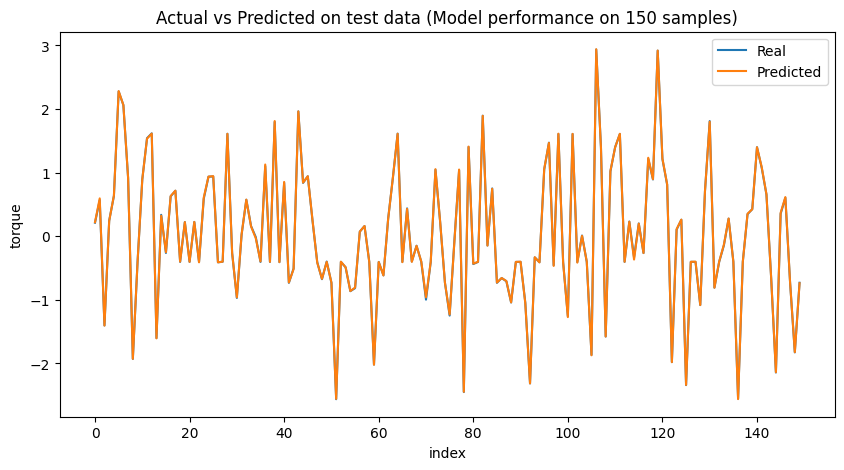

In [30]:
n_sample = 150
test_sample = y_test.values.reshape(-1, 1)[:n_sample]
predicted_sample = y_pred.squeeze(dim=1).detach().numpy()[:n_sample]


plt.figure(figsize=(10, 5))
plt.plot(range(len(test_sample)), test_sample, label='Real')
plt.plot(range(len(predicted_sample)), predicted_sample, label='Predicted')
plt.xlabel('index')
plt.ylabel('torque')
plt.legend()
plt.title("Actual vs Predicted on test data "
            f"(Model performance on {n_sample} samples)")
plt.show()